In [1]:
id1 = "318510070"
id2 = "206073124"

name_student_1 = "Amit, Fallach"
name_student_2 = "Linoy ,Medalsy "

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

df = pd.DataFrame([id1,id2])
df = pd.DataFrame([id1])
df.to_clipboard(index=False,header=False)

In [11]:
file1 = "https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv"
NBAdata = pd.read_csv(file1)
NBAdata = NBAdata.copy()

solution to question 1 : We will omit all the empty values and present the first 3 lines from the wanted columns \ We will take the 3 columns and save them in a separate variable, there a total of 11 lines with missing values, so we will remove all the lines that have missing values

In [3]:
NBAdata1 = NBAdata[["Age","Height","Weight","Salary"]].dropna().reset_index(drop=True)
NBAdata1.head(3)

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
2,22.0,6-5,185.0,1148640.0


solution to question 2 : We will split the values in the "Height" column into 2 indexes and make them "float". then We create a new column with the values by cm

In [4]:
NBAdata['heigh-feet'] = NBAdata["Height"].str.split('-').str[0].astype("float")
NBAdata['heigh-inc'] = NBAdata["Height"].str.split('-').str[1].astype("float")
NBAdata['Height in cm'] = (NBAdata['heigh-feet'] * 30.48) + (NBAdata['heigh-inc']*2.54)

NBAdata2 = NBAdata[['Age','Height in cm','Weight','Salary']].dropna().reset_index(drop=True)
NBAdata2.head(3)

,Age,Height in cm,Weight,Salary
0,25.0,187.96,180.0,7730337.0
1,25.0,198.12,235.0,6796117.0
2,22.0,195.58,185.0,1148640.0


solution to question 3 : we Build a matrix of a row with 2 columns, and then put the pie plot and the countplot inside.

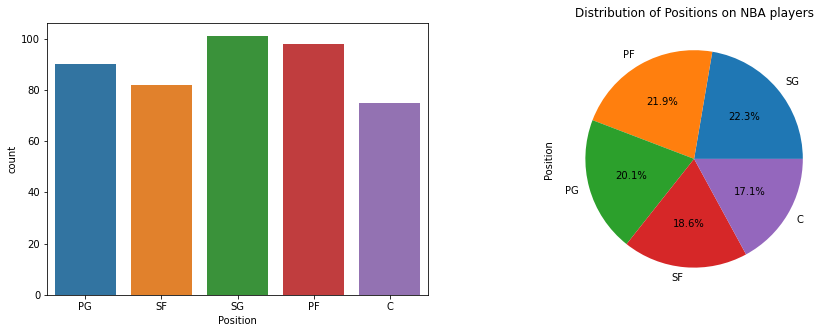

In [5]:
NBAdata2["Position"] = NBAdata["Position"]
fig, axes = plt.subplots(1, 2,figsize = (15,5))
sns.countplot(ax=axes[0], x="Position", data=NBAdata2)
plt.title("Distribution of Positions on NBA players")
NBAdata['Position'].value_counts().plot.pie(ax=axes[1],autopct="%1.1f%%") 
plt.show()

We think the pie plot is more obvious because its shows the options in percentages in more convenient way.

solution to question 4 : We select a train group and a test group from the Data Frame and present the first 5 lines.

In [6]:
features = ['Age','Height in cm','Weight']  
X = NBAdata2[features]
y = NBAdata2['Salary']

X_train,X_test,y_train,y_test = sk.model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

print("The x_train is: \n",X_train.head(),"\n")
print("The y_test is: \n",y_test.head())

The x_train is: 
       Age  Height in cm  Weight
108  24.0        195.58   194.0
227  31.0        185.42   205.0
416  20.0        203.20   240.0
118  31.0        200.66   210.0
114  20.0        195.58   195.0 

The y_test is: 
 284      55722.0
358    5000000.0
117     947276.0
423    5016000.0
70     2900000.0
Name: Salary, dtype: float64


solution to question 5 : we use the "Regressor" model becuse we want to measure numerical values and "Classifier" model fit to categorical values.

In [7]:
# Define model.
NBAdata_model = DecisionTreeRegressor(random_state=42)

# Fit model
NBAdata_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

solution to question 6 : We will make a prediction and define a new DF, then we will arrange the index and print it in a convenient visual way to see the salary in relation to the prediction, then we will print the accuracy.

In [8]:
NBApredict = NBAdata_model.predict(X_test)
NBA6 = pd.DataFrame(columns = ['Salary', 'Predictions'])
NBA6['Salary'] = y_test.reset_index(drop=True)
NBA6['Predictions'] = pd.Series(NBApredict)

print("MSE: {:.3f}".format(mse(NBApredict,y_test,squared = False)))
NBA6 

MSE: 7011699.886


,Salary,Predictions
0,55722.0,134215.0
1,5000000.0,21468695.0
2,947276.0,947276.0
3,5016000.0,7700000.0
4,2900000.0,4500000.0
...,...,...
129,525093.0,1842000.0
130,5500000.0,4000000.0
131,947276.0,3750000.0
132,1824360.0,2658240.0


solution to question 7 : We will add the column 'Position' and make it a category, then we will do all the actions we done before for the prediction and then we present the accuracy

In [9]:
NBAdata2['Position_cat'] = NBAdata2['Position'].astype('category').cat.codes
features1 = ['Age','Height in cm','Weight','Position_cat']  

X2 = NBAdata2[features1]
y2 = NBAdata2['Salary']

X_train2,X_test2,y_train2,y_test2 = sk.model_selection.train_test_split(X2,y2,test_size=0.3,random_state=42)

NBAdata_model2 = DecisionTreeRegressor(random_state=42)

NBAdata_model2.fit(X_train2, y_train2)
NBApredict2 = NBAdata_model2.predict(X_test2)
NBA7 = pd.DataFrame(columns = ['Salary', 'Predictions'])
NBA7['Salary'] = y_test2.reset_index(drop=True)
NBA7['Predictions'] = pd.Series(NBApredict2)

print("MSE: {:.3f}".format(mse(NBApredict2,y_test2,squared = False)))
NBA7 

MSE: 7560454.074


,Salary,Predictions
0,55722.0,1015421.0
1,5000000.0,21468695.0
2,947276.0,5675000.0
3,5016000.0,22359364.0
4,2900000.0,947276.0
...,...,...
129,525093.0,1842000.0
130,5500000.0,261894.0
131,947276.0,3750000.0
132,1824360.0,2505720.0


The accuracy came out higher so the prediction without the column 'Position' is better

solution to question 8 : We tested some depth limits and the depth of 3 steps reduced to the minimum mse

In [10]:
model8 = DecisionTreeRegressor(max_depth=3,random_state=42)
model8.fit(X_train2,y_train2)
modelpre = model8.predict(X_test2)
print("MSE: {:.3f}".format(mse(modelpre,y_test2,squared=False)))

MSE: 5359227.871
